# Example - 06 - Titan Aerocapture: Part 2

In this example, you will learn to create an aerocapture feasibility chart for Titan.

For reference, we will re-create another figure from the paper "Lu and Saikia, Feasibility Assessment of Aerocapture for Future Titan Orbiter Missions, Journal of Spacecraft and Rockets, Vol. 55, No. 5, 2018". DOI: 10.2514/1.A34121

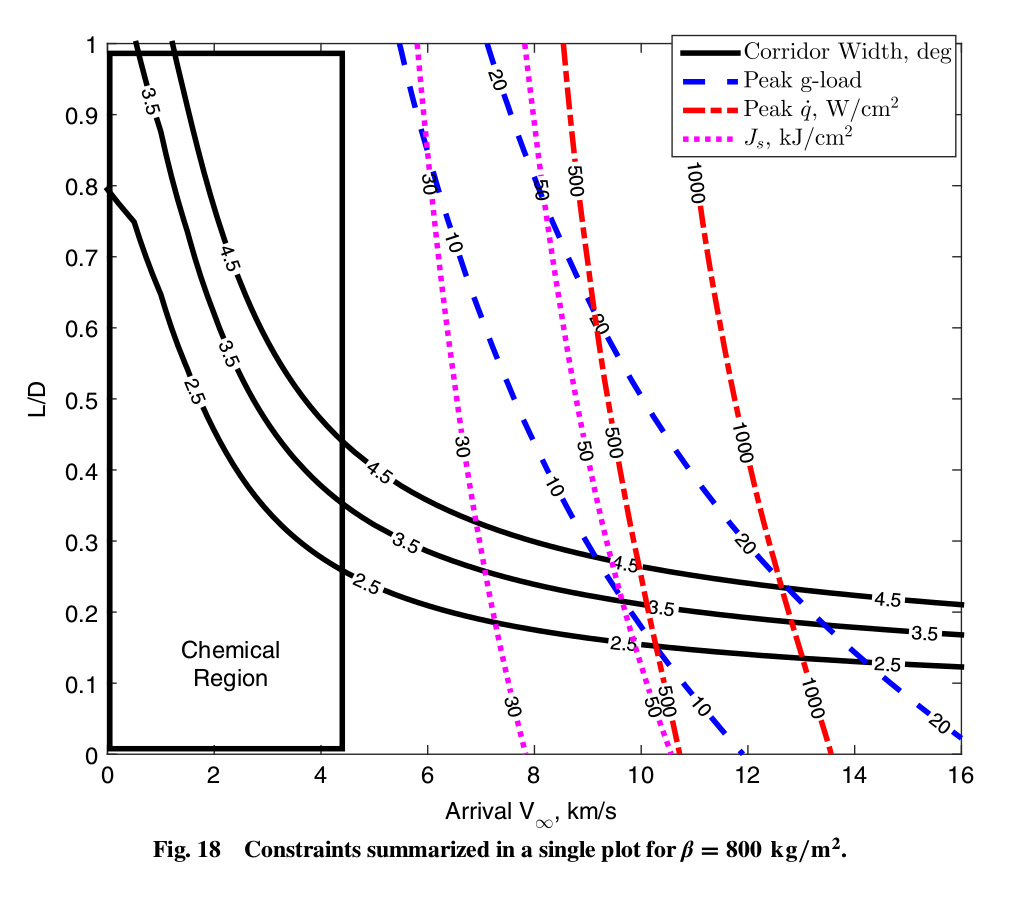

In [2]:
from IPython.display import Image
Image(filename='../plots/lu-saikia-reference-b.png', width=600)

We will use AMAT to recreate this figure.

In [4]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [5]:
# Create a planet object for Titan
planet=Planet("TITAN")

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Titan/titan-gram-avg.dat', 0 , 1 , 2, 3)

# Define the range for arrival Vinf and vehicle L/D
#vinf_kms_array = np.linspace( 0.0,   16.0,  17)
#LD_array       = np.linspace( 0.0,    1.0 , 11)

vinf_kms_array = np.linspace( 0.0,   16.0,  2)
LD_array       = np.linspace( 0.0,    1.0 , 2)

In [8]:
# Create a directory to store the data.
# NOTE: You will get an error if the file already exists,
# Rename the folder to something else.

os.makedirs('../data/luSaikia2018b')

# Use a runID to prefix the files for easy access for post-processing.
runID = 'BC800RAP1700'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

# Compute the inertial entry speed from the hyperbolic excess speed.
v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 + \
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

# Initialize matrices to store data.
overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array))) 
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array))) 
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array))) 
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array))) 
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array))) 

In [9]:
# Compute the corridor width over the defined Vinf and L/D matrix.
# Note this will take maybe about an hour.
# If you simply want to create the plot, you can load the existing data
# in the ../data/luSaikia2018b folder as done below this cell.

for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Kraken', 1000.0, 800.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-5)
        overShootLimit_array[i,j],  exitflag_os_array[i,j] = \
        vehicle.findOverShootLimit (6000.0, 1.0 , -88.0, -2.0, 1E-10, 1700.0)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  \
        vehicle.findUnderShootLimit(6000.0, 1.0 , -88.0, -2.0, 1E-10, 1700.0)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+\
              ": Arrival V_infty: "+str(vinf_kms_array[i])+\
              " km/s"+", L/D:"+str(LD_array[j]) +\
              " OSL: "+str(overShootLimit_array[i,j])+\
              " USL: "+str(underShootLimit_array[i,j])+\
              ", TCW: "+str(TCW_array[i,j])+\
              " EFOS: "+str(exitflag_os_array[i,j])+\
              " EFUS: "+str(exitflag_us_array[i,j]))
        
        count = count +1

np.savetxt('../data/luSaikia2018b/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/luSaikia2018b/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/luSaikia2018b/'+runID+'LD_array.txt',LD_array)
np.savetxt('../data/luSaikia2018b/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/luSaikia2018b/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/luSaikia2018b/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/luSaikia2018b/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/luSaikia2018b/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 4: Arrival V_infty: 0.0 km/s, L/D:0.0 OSL: -26.956788590394353 USL: -26.956788590394353, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 4: Arrival V_infty: 0.0 km/s, L/D:1.0 OSL: -25.871938262091135 USL: -29.038724038098735, TCW: 3.1667857760076004 EFOS: 1.0 EFUS: 1.0
Run #3 of 4: Arrival V_infty: 16.0 km/s, L/D:0.0 OSL: -39.84376757530299 USL: -39.84376757530299, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #4 of 4: Arrival V_infty: 16.0 km/s, L/D:1.0 OSL: -36.570328679677914 USL: -73.23443301925363, TCW: 36.664104339575715 EFOS: 1.0 EFUS: 1.0


Compute the deceleration and heating loads.

In [11]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array))) 
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array))) 
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array))) 
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array))) 

for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Kraken', 1000.0, 800.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)

        vehicle.propogateEntry(6000.0, 1.0, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5) 
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('Kraken', 1000.0, 800.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)

        vehicle.propogateEntry(6000.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5) 
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us)) 
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us)) 
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_us))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))

np.savetxt('../data/luSaikia2018b/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)	
np.savetxt('../data/luSaikia2018b/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)	
np.savetxt('../data/luSaikia2018b/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)	
np.savetxt('../data/luSaikia2018b/'+runID+'heatload_max_array.txt',heatload_max_array)



V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 0.08593800433366519 QDOT_MAX: 3.3840702698532916 J_MAX: 3105.3432488210888 STAG. PRES: 0.006791519497339366
V_infty: 0.0 km/s, L/D: 1.0 G_MAX: 0.2138845693807405 QDOT_MAX: 4.4347653958262985 J_MAX: 3779.309589359269 STAG. PRES: 0.004034330122158686
V_infty: 16.0 km/s, L/D: 0.0 G_MAX: 19.241162906177003 QDOT_MAX: 1655.1562320104672 J_MAX: 104695.16040529005 STAG. PRES: 1.490930766802923
V_infty: 16.0 km/s, L/D: 1.0 G_MAX: 152.35197757039305 QDOT_MAX: 3435.125582934429 J_MAX: 187897.62494657672 STAG. PRES: 0.4145223323207587


We are now ready to create the plot!

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


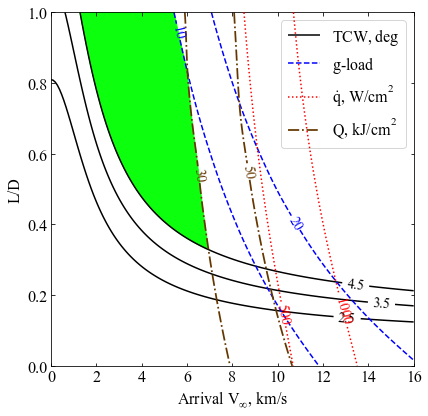

In [14]:
x = np.loadtxt('../data/luSaikia2018b/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/luSaikia2018b/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/luSaikia2018b/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/luSaikia2018b/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/luSaikia2018b/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/luSaikia2018b/'+runID+'heatload_max_array.txt')

f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')	
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')

x_new =  np.linspace( 0.0,   16,  170)
y_new =  np.linspace( 0.0,   1.0 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
	for j in range(0,len(y_new)):

		z1_new[i,j] = f1(x_new[i],y_new[j])
		g1_new[i,j] = g1(x_new[i],y_new[j])
		q1_new[i,j] = q1(x_new[i],y_new[j])
		h1_new[i,j] = h1(x_new[i],y_new[j])

Z1 = z1_new
G1 = g1_new
Q1 = q1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([2.5,3.5,4.5])
Glevels = np.array([10.0, 20.0])
Qlevels = np.array([500.0, 1000.0])
Hlevels = np.array([30.0, 50.0])


fig = plt.figure()
fig.set_size_inches([6.5, 6.5])
plt.ion()
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')
plt.clabel(ZCS1, inline=1, fontsize=14, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.50)
ZCS1.collections[1].set_linewidths(1.50)
ZCS1.collections[2].set_linewidths(1.50)
ZCS1.collections[0].set_label(r'$TCW, deg$')

GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')
plt.clabel(GCS1, inline=1, fontsize=14, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.50)
GCS1.collections[1].set_linewidths(1.50)
GCS1.collections[0].set_label(r'$g$'+r'-load')

QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted',zorder=11)
plt.clabel(QCS1, inline=1, fontsize=14, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.50)
QCS1.collections[1].set_linewidths(1.50)
QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')
plt.clabel(HCS1, inline=1, fontsize=14, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.ylabel("L/D",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=16)


dat0 = ZCS1.allsegs[2][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = GCS1.allsegs[0][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = HCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,301)
y4 = F1(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')
plt.xlim([0.0,16.0])
plt.ylim([0.0,1.0])

plt.savefig('../plots/LuSaikia2018b-fig18.png',bbox_inches='tight')
plt.savefig('../plots/LuSaikia2018b-fig18.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/LuSaikia2018b-fig18.eps', dpi=300,bbox_inches='tight')

plt.show()


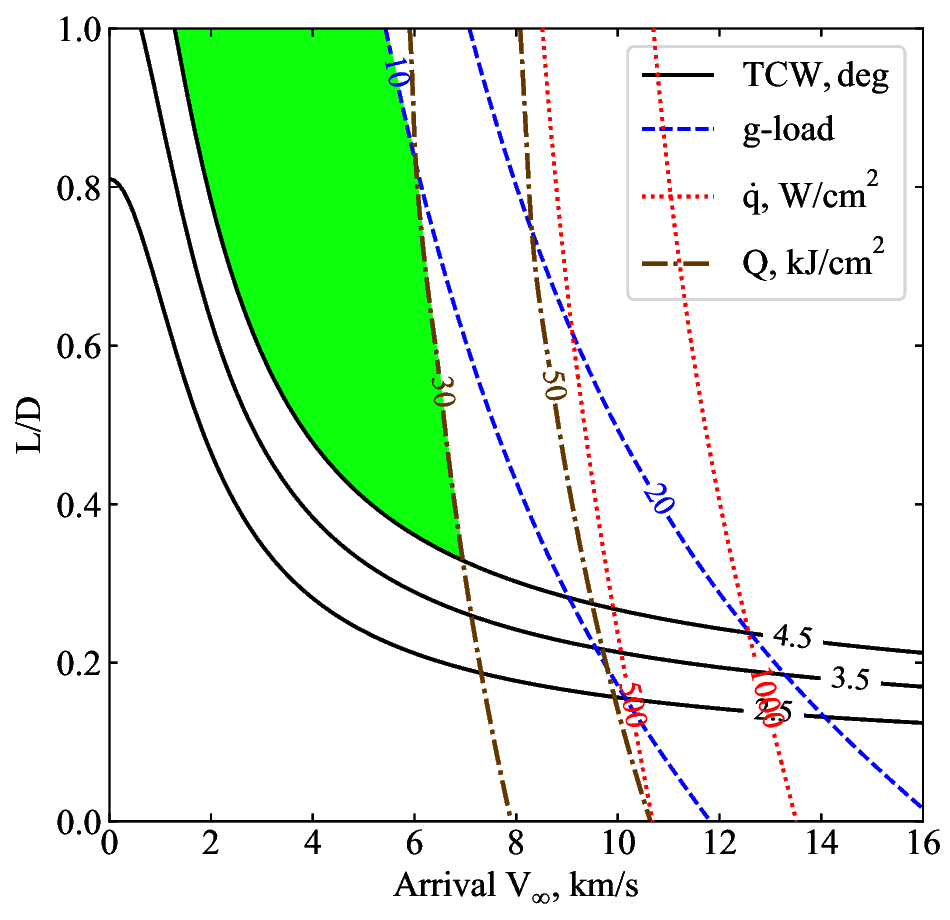

In [16]:
from IPython.display import Image
Image(filename='../plots/luSaikia2018b-higher-res.png', width=600)

The plots are now saved in plots/LuSaikia2018b and should match with the results from the paper.

**Congratulations!** You have created another aerocapture feasibility chart for Titan. In the next example, you will recreate the similar feasibility charts for Venus.